In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the dataset
#train=pd.read_csv('train.csv', dtype={'Age': np.float64})
#test=pd.read_csv('test.csv', dtype={'Age': np.float64})

#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
full_data = [train, test]

print (train.info())

#get a list of the features within the dataset
#print(train.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [24]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
FamilySize       0
IsAlone          0
dtype: int64


In [25]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
FamilySize       0
IsAlone          0
dtype: int64


In [2]:
#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lundahl, Mr. Johan Svensson",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
# There are a total of 891 passengers in our training set
# There are some features that have missing data. I will have to decide on how to fil the missing data
#see a sample of the dataset to get an idea of the variables
train.sample(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.500,NaN,S
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.275,D36,C
525,526,0,3,"Farrell, Mr. James",male,40.5,0,0,367232,7.750,NaN,Q
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.100,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.000,NaN,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.000,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.000,A36,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.275,NaN,S
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225,NaN,C



 
''''''* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

#### What are the data types for each feature?
* Survived: int
* Pclass: int
* Name: string
* Sex: string
* Age: float
* SibSp: int
* Parch: int
* Ticket: string
* Fare: float
* Cabin: string
* Embarked: string

In [8]:
# Explore and Visualize the Data
# make a data table of survival rate, grouped by passenger class
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


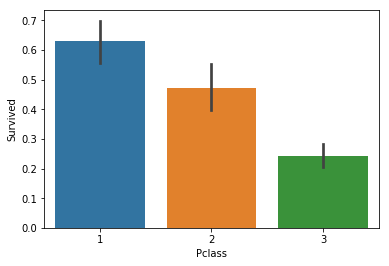

In [11]:
# draw a bar chart of survival, grouped by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

The above data table and bar chart confirm a logical assumption that 'Pclass' has impact on survival. I will treat this feature as categorical.

In [12]:
# make a data table of survival rate, grouped by gender
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


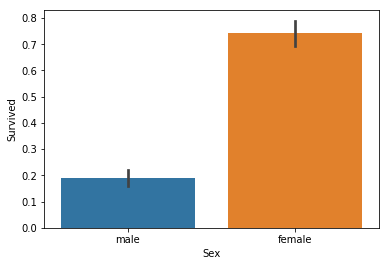

In [13]:
# draw a bar chart of survival, grouped by Sex
sns.barplot(x="Sex", y="Survived", data=train)

Gender has a very strong impact on survival. I will treat this as a categorical variable

In [20]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)





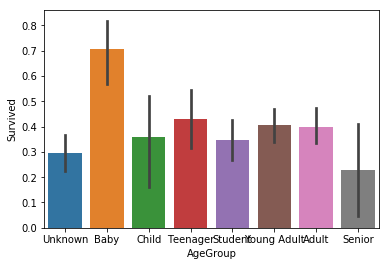

In [18]:
#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

There is not much difference in survival rate with any non baby age group. I will treat this as a numerical variable.

In [23]:
# I will use 'SibSp' and 'Parch' to create two new features called 'FamilySize' and 'IsAlone'
for row in train:
    train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
    
for row in test:
    test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
    
for row in train:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
    
for row in test:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1

In [26]:
# make a data table of survival rate, grouped by gender
print (train[["IsAlone", "Survived"]].groupby(['IsAlone'], as_index=False).mean())


   IsAlone  Survived
0        0  0.505650
1        1  0.303538


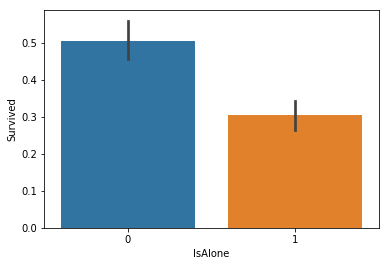

In [31]:
# draw a bar chart of survival, grouped by Sex
sns.barplot(x="IsAlone", y="Survived", data=train)

Not being alone (IsAlone == 0) has an impact on survival rate, when compared to people who were alone. I will treat this as a categorical variable. I like how this simplifies the 'SibSp' and 'Parch' features. Also, using the binary 'IsAlone' feature may save from overfitting the model.

In [32]:
# I will drop the 'SibSp' , 'Parch' , and 'FamilySize' features.
# They will not be used going forward.
train.drop(labels=['SibSp', 'Parch', 'FamilySize'],inplace=True,axis=1)
test.drop(labels=['SibSp', 'Parch', 'FamilySize'],inplace=True,axis=1)

ValueError: labels ['SibSp' 'Parch' 'FamilySize'] not contained in axis

In [29]:
# I can't think of  anything useful about the 'Ticket' feature. I'll drop this feature also.
# you want to change to inplace=True to affect the underlying data
# axis=1 refers to an action on column labels
train.drop(labels='Ticket',inplace=True,axis=1)
test.drop(labels='Ticket',inplace=True,axis=1)

In [30]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,AgeGroup,IsAlone
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,9.8375,NaN,S,Student,1
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,7.7958,NaN,S,Young Adult,1
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,90.0000,C78,Q,Young Adult,0
421,422,0,3,"Charters, Mr. David",male,21.0,7.7333,NaN,Q,Student,1
126,127,0,3,"McMahon, Mr. Martin",male,-0.5,7.7500,NaN,Q,Unknown,1
751,752,1,3,"Moor, Master. Meier",male,6.0,12.4750,E121,S,Child,0
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,49.5042,C90,C,Student,1
576,577,1,2,"Garside, Miss. Ethel",female,34.0,13.0000,NaN,S,Young Adult,1
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,8.6625,NaN,S,Student,1
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,-0.5,7.7750,NaN,S,Unknown,1


In [ ]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    print (dataset['Title'])

In [ ]:
test['Fare']=test['Fare'].fillna(np.mean(test['Fare'])).astype(float)

In [ ]:
test['Age']=test['Age'].fillna(np.mean(test['Age'])).astype(float)

In [ ]:
train['Age']=train['Age'].fillna(np.mean(train['Age'])).astype(float)

In [ ]:
print(pd.isnull(train).sum())

In [ ]:
print(pd.isnull(test).sum())

In [ ]:
sex=pd.get_dummies(train['Sex'],drop_first=True,prefix='sex')#male=1 and  female=0
sextest=pd.get_dummies(test['Sex'],drop_first=True,prefix='sex')#male=1 and  female=0

In [ ]:
train=pd.concat([train,sex],axis=1).drop(['Sex'],axis=1)


In [ ]:
print (train.head())

In [ ]:
test=pd.concat([test,sextest],axis=1).drop(['Sex'],axis=1)

In [ ]:
# Create a new column for family size and compute mean survival rate based on size from training set


In [ ]:
pc=pd.get_dummies(train['Pclass'],drop_first=True,prefix='pclass')
pctest=pd.get_dummies(test['Pclass'],drop_first=True,prefix='pclass')

In [ ]:
train=pd.concat([train,pc],axis=1).drop(['Pclass'],axis=1)
test=pd.concat([test,pctest],axis=1).drop(['Pclass'],axis=1)

In [ ]:
print (train.head())

In [ ]:
print (test.head())

In [ ]:
alone=pd.get_dummies(train['IsAlone'],drop_first=True,prefix='alone')
alonetest=pd.get_dummies(test['IsAlone'],drop_first=True,prefix='alone')

In [ ]:
train=pd.concat([train,alone],axis=1).drop(['IsAlone'],axis=1)
test=pd.concat([test,alonetest],axis=1).drop(['IsAlone'],axis=1)

In [ ]:
print (train.head())

In [ ]:
print (test.head())

In [ ]:
train=train.loc[:,['Survived', 'Age','Fare', 'sex_male', 'pclass_2', 'pclass_3', 'alone_1']]
test=test.loc[:,['Age','Fare', 'sex_male', 'pclass_2', 'pclass_3', 'alone_1']]

In [ ]:
print (train.head())

In [ ]:
print (test.head())

In [ ]:
xtrain=train.iloc[:,1:].values
xtest=test.values
ytrain=train.iloc[:,0].values

In [ ]:
from sklearn.preprocessing import  StandardScaler
sc_x=StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
xtest=sc_x.transform(xtest)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
ytrain = labelencoder_y.fit_transform(ytrain)

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression # Import Class
classifier = LogisticRegression(random_state = 0) # Creates object of Class with using only one parameter
classifier.fit(X_train, y_train)



In [ ]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
# Function that makes matrix of correct and incorrect predictions
from sklearn.metrics import confusion_matrix # Functions start with lower case
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# Predicting the Test set results
# Create a vector of predictions with the test set
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
# Function that makes matrix of correct and incorrect predictions
from sklearn.metrics import confusion_matrix # Functions start with lower case
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print (cm)

In [ ]:
classifier = LogisticRegression(random_state = 0) # Creates object of Class with using only one parameter
classifier.fit(xtrain, ytrain)

In [ ]:
# Predicting the Test set results
# Create a vector of predictions with the test set
ypred_submit = classifier.predict(xtest)

In [ ]:
output=pd.DataFrame(ypred_submit)

In [ ]:
print (output.head())

In [ ]:
submission=pd.read_csv('submission.csv')
submission['Survived']=output.iloc[0].values

In [ ]:
np.savetxt("predictions_05212018.csv", ypred_submit, delimiter=",")

In [ ]:
# Build K-Nearest Neighbor Model

# Fitting K-NN to the Training set
# Import object, create object and fit object
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Number of neighbors base on euclidean distance
classifier_knn.fit(X_train, y_train)



In [ ]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [ ]:
print (cm_knn)

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)



In [ ]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [ ]:
print (cm_dt)

In [ ]:

X = train_dataset.iloc[:, :-1].values
y = train_dataset.iloc[:, 6].values
#Id = train_dataset.iloc[:, 0].values
#S = train_dataset.iloc[:, 0].values

# Taking care of missing data
# Use mean age to sub for nan values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 3:4])
X[:, 3:4] = imputer.transform(X[:, 3:4])

#X_id = X[:, 0] # Array of id
X = X[:, 1:] # Remove col of id from X

# Print the first row
print (X[0:3])

In [ ]:
# Encoding categorical data for gender
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder() # Creates object
X[:, 1] = labelencoder_X.fit_transform(X[:, 1]) # Transform gender to categories
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray() # Encodes as categorical variables


print (X[0:3])